# Actividad Práctica 2
# Técnicas de aprendizaje profundo
# Parte 2: Redes neuronales recurrentes

<div class="alert alert-info">

</div>


## Explorar los datos

In [29]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [11]:
path_assets = os.path.abspath(os.path.join(os.getcwd(),'..'))
df = pd.read_csv(os.path.join(path_assets, os.path.normpath('assets/international-airline-passengers.csv')))
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [13]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


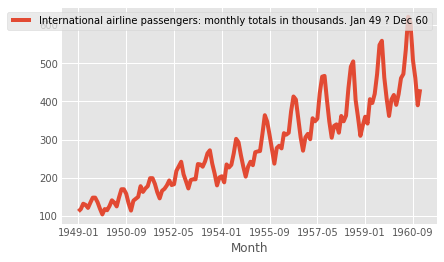

In [30]:
df.plot.line(x=df.columns[0], y=df.columns[1])

El gráfico muestra el total mensual de pasajeros en vuelos internacionales en EE.UU para el perı́odo Enero 1949 a Diciembre 1960. Las cifras están en miles de pasajeros por mes. 

La tendencia creciente de la curva muestra el aumento de pasajeros a lo largo de los años. Adicionalmente,
cada año presenta *peaks* característicos causados por aumentos puntuales de la demanda debido al perı́odo de
vacaciones y festividades especiales.

Se intentará predecir en el tiempo la cantidad de pasajeros, usando RNN.



## RNN

In [37]:
# Definicion de librerias con la funciones que seran utilizadas por Keras.
import keras
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers.recurrent import SimpleRNN
from keras.layers.convolutional import Convolution2D, ZeroPadding2D, Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D

In [32]:
# nueva instancia de red secuencial
modelRNN = Sequential()

In [46]:
# capa con una RNN
modelRNN.add(SimpleRNN(5, input_shape=(4,1), return_sequences=False))

Se reescribió la función debido a la sugerencia contenida en la nueva versión de la API de `keras`:

<div class="alert alert-danger">
/home/diego/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if __name__ == '__main__':
/home/diego/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(5, return_sequences=False, input_shape=(4, 1))`
  if __name__ == '__main__':
</div>

En este caso, se tiene que
*  El primer término según la documentación corresponde a `units`, lo que sería la dimensionalidad de $h_t=5$.
*  `input_dim` es el equivalente a la dimensión de los datos $x_t$ de entrada. En este caso es la demanda mensual, la cual sólo requiere de una dimensión.
*  `input_length` es el equivalente al largo de la secuencia de entrada. Para este caso, se consideran cuatro meses por lo que su valor es 4
*  El término `eturn_sequences=False` indica que el valor la salida $y_t$ se calcula sólo en la última unidad

La red resultante gráficamente tiene la siguiente forma

![rnn1](img/rnn1.png)

## Actividad 8
Considerando los parámetros $W$ de la red según este diagrama, se tiene que

*  $W_{xh}$ tiene dimensionalidad $5\times1$
*  $W_{hh}$ tiene dimensionalidad $5\times5$
*  $W_{hy}$ tiene dimensionalidad $5\times1$

Esto suma en total 35 parámetros

In [49]:
modelRNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 5)                 35        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Si se desea cambiar la dimensionalidad de $h_t$ a $4$, según el análisis anterior

*  $W_{xh}$ tiene dimensionalidad $4\times1$
*  $W_{hh}$ tiene dimensionalidad $4\times4$
*  $W_{hy}$ tiene dimensionalidad $4\times1$

La dimensionalidad se ve reducida a $4+16+4=24$ unidades. 

In [55]:
# nueva instancia de red secuencial
modelRNN_temp = Sequential()

In [57]:
modelRNN_temp.add(SimpleRNN(4, input_shape=(4,1), return_sequences=False))

In [58]:
modelRNN_temp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 4)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


En términos generales si el estado intermedio es de dimensión $n$, los parámetros resultantes serán de $2n + n^2= n(2+n)$

Finalmente, dado que se desea predecir una variable de la misma dimensionalidad que la entrada, basta con agregar una capa densa de una neurona, sin función de activación

In [61]:
modelRNN.add(Dense(1))

## Actividad 10
Los resultados de ejecutar `AirlinePrediction.py` 10 veces se indican en la siguente tabla

In [129]:
from io import StringIO
test_data = pd.read_csv(StringIO('''Train, Test
21.91,46.80
21.43,54.20
21.66,46.47
22.17,62.59
22.22,61.48
'''))

In [130]:
test_data.describe()

,Train,Test
count,5.000000,5.000000
mean,21.878000,54.308000
std,0.335961,7.711113
min,21.430000,46.470000
25%,21.660000,46.800000
50%,21.910000,54.200000
75%,22.170000,61.480000
max,22.220000,62.590000


Text(0,0.5,'RMSE Score')

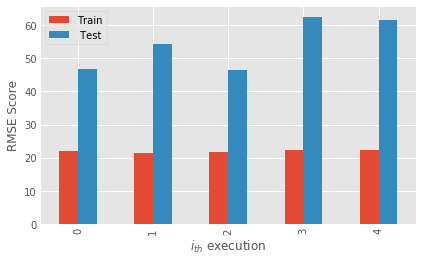

In [131]:
ax = test_data.plot.bar(stacked=False)
ax.set_xlabel("$i_{th}$ execution")
ax.set_ylabel("RMSE Score")

Al cambiar el parámetro `history=4` por `history=10` se tiene

In [132]:
test_data10 = pd.read_csv(StringIO('''
train, test
22.36,57.13
21.80,67.79
18.28,44.50
19.61,40.57
19.48,46.26
'''))

# pd.read_csv()

In [133]:
test_data10.describe()

,train,test
count,5.000000,5.000000
mean,20.306000,51.250000
std,1.711894,11.098097
min,18.280000,40.570000
25%,19.480000,44.500000
50%,19.610000,46.260000
75%,21.800000,57.130000
max,22.360000,67.790000


Text(0,0.5,'RMSE Score')

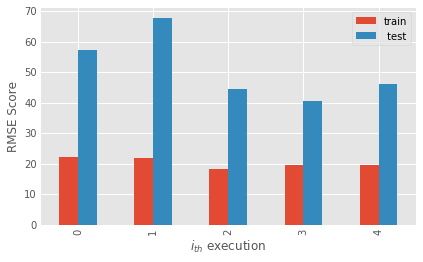

In [134]:
ax = test_data10.plot.bar()
ax.set_xlabel("$i_{th}$ execution")
ax.set_ylabel("RMSE Score")

Se agrega una capa densa de 100 unidades, incorporando

```
modelRNN.add(SimpleRNN(5,input_shape=(history,1), return_sequences=False))
modelRNN.add(Dense(100)) # Para actividad 10
modelRNN.add(Dense(1))
```

In [136]:
test_data100dense = pd.read_csv(StringIO('''
Train,Test
22.09,46.71
22.57,44.77
21.85,48.42
21.35,51.81
21.18,52.12
'''))

# pd.read_csv()

In [137]:
test_data100dense.describe()

,Train,Test
count,5.000000,5.000000
mean,21.808000,48.766000
std,0.562601,3.194923
min,21.180000,44.770000
25%,21.350000,46.710000
50%,21.850000,48.420000
75%,22.090000,51.810000
max,22.570000,52.120000


Text(0,0.5,'RMSE Score')

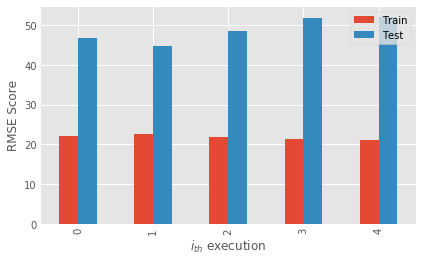

In [138]:
ax = test_data100dense.plot.bar()
ax.set_xlabel("$i_{th}$ execution")
ax.set_ylabel("RMSE Score")

Finalmente, al agregar una capa con `Dropout()` se tiene

In [139]:
test_data_dropout = pd.read_csv(StringIO('''
Train, Test
31.54,83.60
30.25,82.93
25.67,62.99
33.70,95.03
29.99,80.83
'''))

# pd.read_csv()


Text(0,0.5,'RMSE Score')

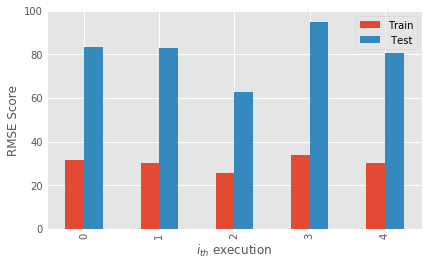

In [140]:
ax = test_data_dropout.plot.bar()
ax.set_xlabel("$i_{th}$ execution")
ax.set_ylabel("RMSE Score")

In [153]:
test_all = pd.concat([test_data,test_data10,test_data100dense,test_data_dropout], axis=1, )

In [154]:
test_all.head()

,Train,Test,train,test,Train,Test,Train,Test
0,21.91,46.80,22.36,57.13,22.09,46.71,31.54,83.60
1,21.43,54.20,21.80,67.79,22.57,44.77,30.25,82.93
2,21.66,46.47,18.28,44.50,21.85,48.42,25.67,62.99
3,22.17,62.59,19.61,40.57,21.35,51.81,33.70,95.03
4,22.22,61.48,19.48,46.26,21.18,52.12,29.99,80.83


Se asignarán letras a cada ensayo, tal que
*  A es la red original
*  B es la red con `history=10`
*  C es la red con `Dense(100)` antes de `Dense(1)`
*  D es la red con `Dropout(0.5)` antes de `Dense(1)`

In [155]:
test_all.columns = ['trainA','testA','trainB','testB','trainC','testC','trainD','testD']

In [157]:
test_all_train=test_all.reindex(columns=['trainA','trainB','trainC','trainD'])
test_all_test=test_all.reindex(columns=['testA','testB','testC','testD'])

Text(0,0.5,'RMSE Score')

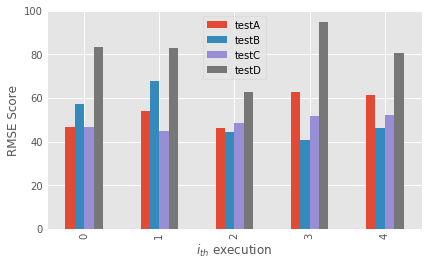

In [161]:
ax = test_all_test.plot.bar()
ax.set_xlabel("$i_{th}$ execution")
ax.set_ylabel("RMSE Score")

Text(0,0.5,'RMSE Score')

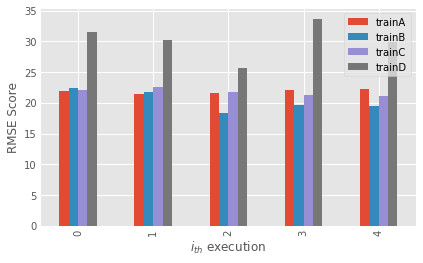

In [163]:
ax = test_all_train.plot.bar()
ax.set_xlabel("$i_{th}$ execution")
ax.set_ylabel("RMSE Score")

<div class="alert alert-danger">
TODO: Faltan conclusiones
</div>


## Actividad 11